In [42]:
import os
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# Getting the DataBase Locally

## Metadata

In [43]:
md_df = pd.read_csv('../raw_data/archive/HAM10000_metadata.csv')

In [44]:
md_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


## Image Data

In [45]:
image_list = []

for x in glob(os.path.join("../raw_data/archive/HAM10000_all_images", "*.jpg")):
    image_list.append(x)

image_list

['../raw_data/archive/HAM10000_all_images/ISIC_0030858.jpg',
 '../raw_data/archive/HAM10000_all_images/ISIC_0030680.jpg',
 '../raw_data/archive/HAM10000_all_images/ISIC_0033389.jpg',
 '../raw_data/archive/HAM10000_all_images/ISIC_0032097.jpg',
 '../raw_data/archive/HAM10000_all_images/ISIC_0032929.jpg',
 '../raw_data/archive/HAM10000_all_images/ISIC_0026784.jpg',
 '../raw_data/archive/HAM10000_all_images/ISIC_0028971.jpg',
 '../raw_data/archive/HAM10000_all_images/ISIC_0026948.jpg',
 '../raw_data/archive/HAM10000_all_images/ISIC_0026790.jpg',
 '../raw_data/archive/HAM10000_all_images/ISIC_0028965.jpg',
 '../raw_data/archive/HAM10000_all_images/ISIC_0025299.jpg',
 '../raw_data/archive/HAM10000_all_images/ISIC_0032083.jpg',
 '../raw_data/archive/HAM10000_all_images/ISIC_0024839.jpg',
 '../raw_data/archive/HAM10000_all_images/ISIC_0030694.jpg',
 '../raw_data/archive/HAM10000_all_images/ISIC_0024811.jpg',
 '../raw_data/archive/HAM10000_all_images/ISIC_0030864.jpg',
 '../raw_data/archive/HA

In [46]:
image_df = pd.DataFrame(image_list)

In [47]:
image_df.columns = ['filepath']
image_df.head()

,filepath
0,../raw_data/archive/HAM10000_all_images/ISIC_0...
1,../raw_data/archive/HAM10000_all_images/ISIC_0...
2,../raw_data/archive/HAM10000_all_images/ISIC_0...
3,../raw_data/archive/HAM10000_all_images/ISIC_0...
4,../raw_data/archive/HAM10000_all_images/ISIC_0...


In [48]:
image_df['image_id'] = image_df['filepath'].apply(lambda x: os.path.basename(x).strip('.jpg'))
image_df['image_id'] = image_df['image_id'].astype('string')
image_df.head()

,filepath,image_id
0,../raw_data/archive/HAM10000_all_images/ISIC_0...,ISIC_0030858
1,../raw_data/archive/HAM10000_all_images/ISIC_0...,ISIC_0030680
2,../raw_data/archive/HAM10000_all_images/ISIC_0...,ISIC_0033389
3,../raw_data/archive/HAM10000_all_images/ISIC_0...,ISIC_0032097
4,../raw_data/archive/HAM10000_all_images/ISIC_0...,ISIC_0032929


## Joining Metadata and Image data

In [49]:
md_df['image_id'] = md_df['image_id'].astype('string')
md_df.dtypes

lesion_id               object
image_id        string[python]
dx                      object
dx_type                 object
age                    float64
sex                     object
localization            object
dtype: object

In [50]:
md_df.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')

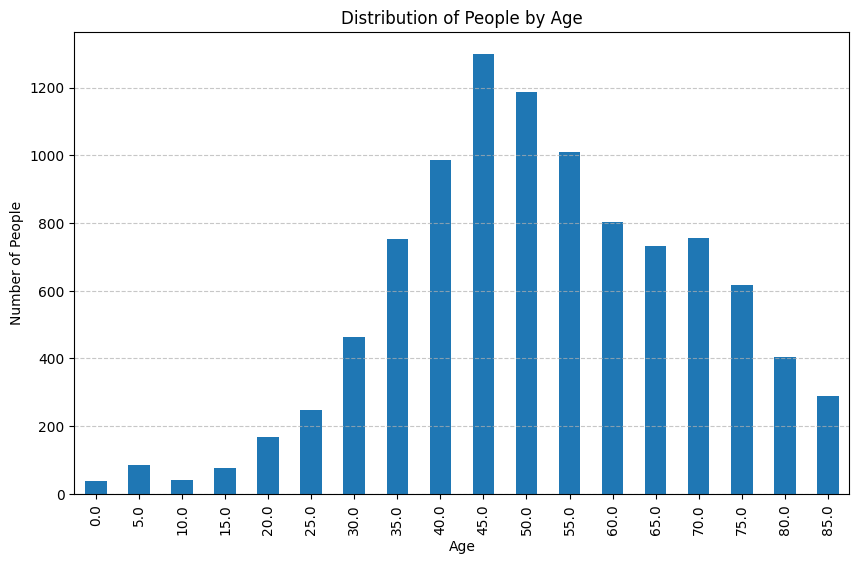

In [51]:
md_df['age'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Distribution of People by Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [52]:
md_df['sex'].value_counts()

sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64

In [53]:
    # 'nv': 'Melanocytic nevi',
    # 'mel': 'Melanoma',
    # 'bkl': 'Benign keratosis-like lesions ',
    # 'bcc': 'Basal cell carcinoma',
    # 'akiec': 'Actinic keratoses',
    # 'vasc': 'Vascular lesions',
    # 'df': 'Dermatofibroma'

In [54]:
# md_df[md_df['dx'] == 'mel']['sex'].value_counts()
md_df[md_df['sex'] == 'unknown']['dx'].value_counts()

dx
nv     47
bkl    10
Name: count, dtype: int64

In [55]:
md_df[md_df['localization'] == 'unknown']['dx'].value_counts()

dx
nv     196
bkl     23
mel     10
bcc      5
Name: count, dtype: int64

In [56]:
image_df.dtypes

filepath            object
image_id    string[python]
dtype: object

In [57]:
# Step 1: Filter the rows where 'lesion_id' is duplicated
duplicates_df = md_df[md_df['lesion_id'].duplicated(keep=False)]

# Step 2: Get value counts for 'dx' within just those duplicated rows
duplicates_df['dx'].value_counts()

dx
nv       2290
mel       883
bkl       659
bcc       339
akiec     176
vasc       78
df         76
Name: count, dtype: int64

In [58]:
md_df.dtypes

lesion_id               object
image_id        string[python]
dx                      object
dx_type                 object
age                    float64
sex                     object
localization            object
dtype: object

In [59]:
image_df.dtypes

filepath            object
image_id    string[python]
dtype: object

In [60]:
full_df = image_df.merge(md_df, on='image_id', how='left')
full_df.head()

,filepath,image_id,lesion_id,dx,dx_type,age,sex,localization
0,../raw_data/archive/HAM10000_all_images/ISIC_0...,ISIC_0030858,HAM_0001813,nv,histo,60.0,male,trunk
1,../raw_data/archive/HAM10000_all_images/ISIC_0...,ISIC_0030680,HAM_0002381,nv,follow_up,80.0,male,trunk
2,../raw_data/archive/HAM10000_all_images/ISIC_0...,ISIC_0033389,HAM_0000268,nv,histo,10.0,female,trunk
3,../raw_data/archive/HAM10000_all_images/ISIC_0...,ISIC_0032097,HAM_0003006,nv,follow_up,55.0,male,back
4,../raw_data/archive/HAM10000_all_images/ISIC_0...,ISIC_0032929,HAM_0003321,bkl,histo,75.0,female,face


In [61]:
full_df.columns

Index(['filepath', 'image_id', 'lesion_id', 'dx', 'dx_type', 'age', 'sex',
       'localization'],
      dtype='object')

## Dealing with Null Data

In [64]:
full_df.isnull().sum()

filepath         0
image_id         0
lesion_id        0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

## Drop Detection Type

In [65]:
full_df.columns

Index(['filepath', 'image_id', 'lesion_id', 'dx', 'dx_type', 'age', 'sex',
       'localization'],
      dtype='object')

In [73]:
type(full_df)

pandas.core.frame.DataFrame

In [74]:
proc_df = full_df.drop(columns=[col for col in ['dx_type','image_id','lesion_id'] if col in full_df.columns])

In [75]:
proc_df.columns

Index(['filepath', 'dx', 'age', 'sex', 'localization'], dtype='object')

## Age

In [ ]:
# filling the age data with mean values
full_df['age'] = full_df['age'].fillna((full_df['age'].mean()))

In [ ]:
#check to see if there is any null values after filling in the na stuff
full_df.isnull().sum()

## Sex

In [ ]:
# Drop the unknown sex names
full_df = full_df[full_df['sex'] != 'unknown']

## Localization

In [41]:
#drop unknowns
full_df = full_df[full_df['localization'] != 'unknown']

NameError: name 'full_df' is not defined

In [40]:
full_df[full_df['localization'] == 'unknown']['dx'].value_counts()

dx
nv     196
bkl     23
mel     10
bcc      5
Name: count, dtype: int64

# Image Sorting

In [ ]:
# resize the images, and put them in an array
full_df['image_arr'] = full_df['filepath'].apply(lambda x: np.asarray(Image.open(x).resize((96, 96))))

In [ ]:
full_df.head()

In [ ]:
plt.imshow(full_df.iloc[301]['image_arr'])
plt.show()

In [ ]:
full_df.iloc[499]['image_arr'].shape

# Encoding